# Project 3 - due Friday, 12/9 at 12pm

Work in groups of four people per project.

Select a dataset of at least 250,000 records, preferably at the level of individual transactions. Acquire the data, survey it, wrangle it into a suitable format, and analyze it. Present your work in a brief (8-10 minute) talk in class on Tuesday, 12/6, and write up your process and results in a reproducible notebook.

You may use any of the methods we studied in class: Unix command line tools, relational databases and dimensional models with SQLite or PostgreSQL, or Spark. The datanotebook.org server will remain available until the end of the semester and may be used for the project.

*Attestation*: All project team members should contribute meaningfully to the final results. Please attest to your individual contributions and that each member contributed substantially to the project in your final writeup.

*Deadline*: Friday, 12/9, 12pm. Submit your presentation (PDF export), your notebook, and any additionally necessary files like scripts or images together in one zip file. Only one team member should submit on behalf of all members. All team members should post their projects to GitHub for reviews after the deadline has passed.

## Part 1 - Selection (30 points)

Identify and describe your dataset, its source, and what appeals to you about it. Acquire the data and perform an initial exploration to determine which themes you wish to explore. Describe the questions you want to be able to answer with the data, any concerns you have about the data, and any challenges you expect to have to overcome.

In [2]:
!wget https://github.com/gwsb-istm-6212-fall-2016/euhwang_istm_6212/raw/master/Final_Project/sf-bay-area-bike-share-new.zip

--2016-11-25 22:26:37--  https://github.com/gwsb-istm-6212-fall-2016/euhwang_istm_6212/raw/master/Final_Project/sf-bay-area-bike-share-new.zip
Resolving github.com... 192.30.253.113, 192.30.253.112
Connecting to github.com|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/euhwang_istm_6212/master/Final_Project/sf-bay-area-bike-share-new.zip [following]
--2016-11-25 22:26:37--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/euhwang_istm_6212/master/Final_Project/sf-bay-area-bike-share-new.zip
Resolving raw.githubusercontent.com... 151.101.32.133
Connecting to raw.githubusercontent.com|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12334270 (12M) [application/octet-stream]
Saving to: ‘sf-bay-area-bike-share-new.zip.1’

sf-bay-area-bike-sh 100%[===================>]  11.76M  9.90MB/s    in 1.2s    

2016-11-25 22:26:39 (9.90 MB/s) - ‘

In [3]:
!unzip sf-bay-area-bike-share-new.zip

Archive:  sf-bay-area-bike-share-new.zip
replace station.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
!rmdir __MACOSX

In [2]:
!head -250000 trip.csv > trip250.csv

The row count for the dataset is printed below using csvstat.

In [3]:
!echo 'Count in station.csv'
!csvstat --count station.csv
!echo 'Count in trip.csv'
#!csvstat --count trip.csv
!csvstat --count trip250.csv
!echo 'Count in weather.csv'
!csvstat --count weather.csv

Count in station.csv
Row count: 70
Count in trip.csv
Row count: 249999
Count in weather.csv
Row count: 3665


The column names in the dataset are listed below.  There are a total combined of 42 columns in the dataset.

In [6]:
!csvcut -n station.csv

  1: id
  2: name
  3: lat
  4: long
  5: dock_count
  6: city
  7: installation_date


In [4]:
#!csvcut -n trip.csv
!csvcut -n trip250.csv

  1: id
  2: duration
  3: start_date
  4: start_station_name
  5: start_station_id
  6: end_date
  7: end_station_name
  8: end_station_id
  9: bike_id
 10: subscription_type
 11: zip_code


In [8]:
!csvcut -n weather.csv

  1: date
  2: max_temperature_f
  3: mean_temperature_f
  4: min_temperature_f
  5: max_dew_point_f
  6: mean_dew_point_f
  7: min_dew_point_f
  8: max_humidity
  9: mean_humidity
 10: min_humidity
 11: max_sea_level_pressure_inches
 12: mean_sea_level_pressure_inches
 13: min_sea_level_pressure_inches
 14: max_visibility_miles
 15: mean_visibility_miles
 16: min_visibility_miles
 17: max_wind_Speed_mph
 18: mean_wind_speed_mph
 19: max_gust_speed_mph
 20: precipitation_inches
 21: cloud_cover
 22: events
 23: wind_dir_degrees
 24: zip_code


Below, the general descriptive statistics are generated for each of the attributes in the dataset.  Please note that csvstat may take several minutes to run. It takes, on average, 3 minute and 15 seconds.

Given that there are more than 600,000 rows in the csv file, the csvstat command may not work in datanotebook.org.

In [9]:
#!time csvstat station.csv
!csvstat station.csv

  1. id
	<type 'int'>
	Nulls: False
	Min: 2
	Max: 84
	Sum: 3010
	Mean: 43.0
	Median: 43.5
	Standard Deviation: 23.9928560796
	Unique values: 70
  2. name
	<type 'unicode'>
	Nulls: False
	Unique values: 70
	Max length: 45
  3. lat
	<type 'float'>
	Nulls: False
	Min: 37.329732
	Max: 37.80477
	Sum: 2631.3170369
	Mean: 37.5902433843
	Median: 37.6311635
	Standard Deviation: 0.202013933101
	Unique values: 70
  4. long
	<type 'float'>
	Nulls: False
	Min: -122.418954
	Max: -121.877349
	Sum: -8555.2891315
	Mean: -122.218416164
	Median: -122.3121235
	Standard Deviation: 0.207944625064
	Unique values: 70
  5. dock_count
	<type 'int'>
	Nulls: False
	Min: 11
	Max: 27
	Sum: 1236
	Mean: 17.6571428571
	Median: 15.0
	Standard Deviation: 3.98169279968
	Unique values: 6
	5 most frequent values:
		15:	34
		19:	18
		23:	9
		11:	4
		27:	4
  6. city
	<type 'unicode'>
	Nulls: False
	Values: Mountain View, Redwood City, San Francisco, San Jose, Palo Alto
  7. installation_date
	<type 'datetime.date'>
	Nulls: F

In [5]:
#!time csvstat trip.csv
#!time csvstat trip250.csv
!csvstat trip250.csv

  1. id
	<type 'int'>
	Nulls: False
	Min: 4069
	Max: 432946
	Sum: 52664210493
	Mean: 210657.684603
	Median: 172915
	Standard Deviation: 137548.298744
	Unique values: 249999
  2. duration
	<type 'int'>
	Nulls: False
	Min: 60
	Max: 722236
	Sum: 299387151
	Mean: 1197.55339421
	Median: 526
	Standard Deviation: 6449.35856651
	Unique values: 10717
	5 most frequent values:
		357:	411
		355:	407
		449:	401
		406:	399
		372:	398
  3. start_date
	<type 'datetime.datetime'>
	Nulls: False
	Min: 2013-08-29 09:08:00
	Max: 2014-08-31 22:31:00
	Unique values: 142185
	5 most frequent values:
		2014-08-07 08:45:00:	15
		2014-07-17 08:48:00:	14
		2014-08-29 08:49:00:	13
		2014-08-14 08:47:00:	13
		2014-07-09 17:36:00:	13
  4. start_station_name
	<type 'unicode'>
	Nulls: False
	Unique values: 73
	5 most frequent values:
		San Francisco Caltrain (Townsend at 4th):	17903
		Harry Bridges Plaza (Ferry Building):	12414
		Embarcadero at Sansome:	11029
		Market at Sansome:	9945
		San Francisco Caltrain 2 (330 To

In [11]:
!time csvstat weather.csv
!csvstat weather.csv

  1. date
	<type 'datetime.date'>
	Nulls: False
	Min: 2013-08-29
	Max: 2015-08-31
	Unique values: 733
	5 most frequent values:
		2014-06-30:	5
		2013-09-09:	5
		2013-09-08:	5
		2013-09-01:	5
		2013-09-03:	5
  2. max_temperature_f
	<type 'float'>
	Nulls: True
	Min: 44.0
	Max: 102.0
	Sum: 258397.0
	Mean: 70.5809888009
	Median: 70.0
	Standard Deviation: 8.38442705231
	Unique values: 55
	5 most frequent values:
		66.0:	228
		75.0:	212
		64.0:	212
		73.0:	207
		77.0:	192
  3. mean_temperature_f
	<type 'float'>
	Nulls: True
	Min: 38.0
	Max: 84.0
	Sum: 224598.0
	Mean: 61.3488118001
	Median: 61.0
	Standard Deviation: 7.23340847207
	Unique values: 46
	5 most frequent values:
		60.0:	276
		68.0:	234
		58.0:	220
		62.0:	196
		70.0:	193
  4. min_temperature_f
	<type 'float'>
	Nulls: True
	Min: 25.0
	Max: 75.0
	Sum: 190179.0
	Mean: 51.9472821633
	Median: 53.0
	Standard Deviation: 7.44042762547
	Unique values: 45
	5 most frequent values:
		53.0:	272
		55.0:	263
		50.0:	234
		57.0:	222
		59.0:	208
  

The dataset is composed of individual bike trips in the San Francisco Bay Area dating back to January 2011.

This is the link to the San Francisco Bay Area Bike Share data: https://www.kaggle.com/benhamner/sf-bay-area-bike-share

| Field Name | Description|
| -----------|------------|
|Station||
| -----------|------------|
|ID|Unique identifier for the station|
|Name|Station's name|
|Lat|Latitude|
|Long|Longitude|
|Dock_count|Number of bikes the station can hold|
|City|City|
|Installation_date|Installation Date|
|Trip||
| -----------|------------|
|id||
|duration||
|start_date||
|start_station_name||
|start_station_id||
|end_date||
|end_station_name||
|end_station_id||
|bike_id||
|subscription_type||
|zip_code||
|Weather||
| -----------|------------|
|date||
|max_temperature_f||
|mean_temperature_f||
|min_temperature_f||
|max_dew_point_f||
|mean_dew_point_f||
|min_dew_point_f||
|max_humidity||
|mean_humidity||
|min_humidity||
|max_sea_level_pressure_inches||
|mean_sea_level_pressure_inches||
|min_sea_level_pressure_inches||
|max_visibility_miles||
|mean_visibility_miles||
|min_visibility_miles||
|max_wind_Speed_mph||
|mean_wind_speed_mph||
|max_gust_speed_mph||
|precipitation_inches||
|cloud_cover||
|events||
|wind_dir_degrees||
|zip_code| |

Based off of the information shown above, only the zip codes and temperature related fields had nulls.

The columns that interested us the most are time and description fields such as trip start and end date, trip start and end station name, subscription type, zip code, temperature related fields. 

A few of the questions to explore are listed below:
1. How does weather impact bike trips?
2. How do bike trip patterns vary by time of day and the day of the week?

To get a better grasp of the dimensions of the dataset and the nature of the transactions, we filtered the column with the most unique levels in the dataset, and then filtered to a duplicated value in this column.  File number has the most unique values as per the csvstat output, so we use this column to filter by.  File number '1400082626' has 26 instances in the table, so the output below shows the rows in the dataset corresponding to this particular file number.  It seems that each file number can have multiple date time combinations, multiple crimes, and multiple Offense Statutes associated with that particular crime.  In filtering by the most frequent values, it seems that for the overall dataset, these file numbers rarely have address information.  This could suggest some erroneous file number information for those cases which do not have address information, which will be important to consider in our analysis going forward.  Again, when we limit the dataset, we will avoid cases of null address information, and also account for the fact that the data does not have a primary key.

The following image was taken from the Kaggle website. It shows the number of trips between each station.

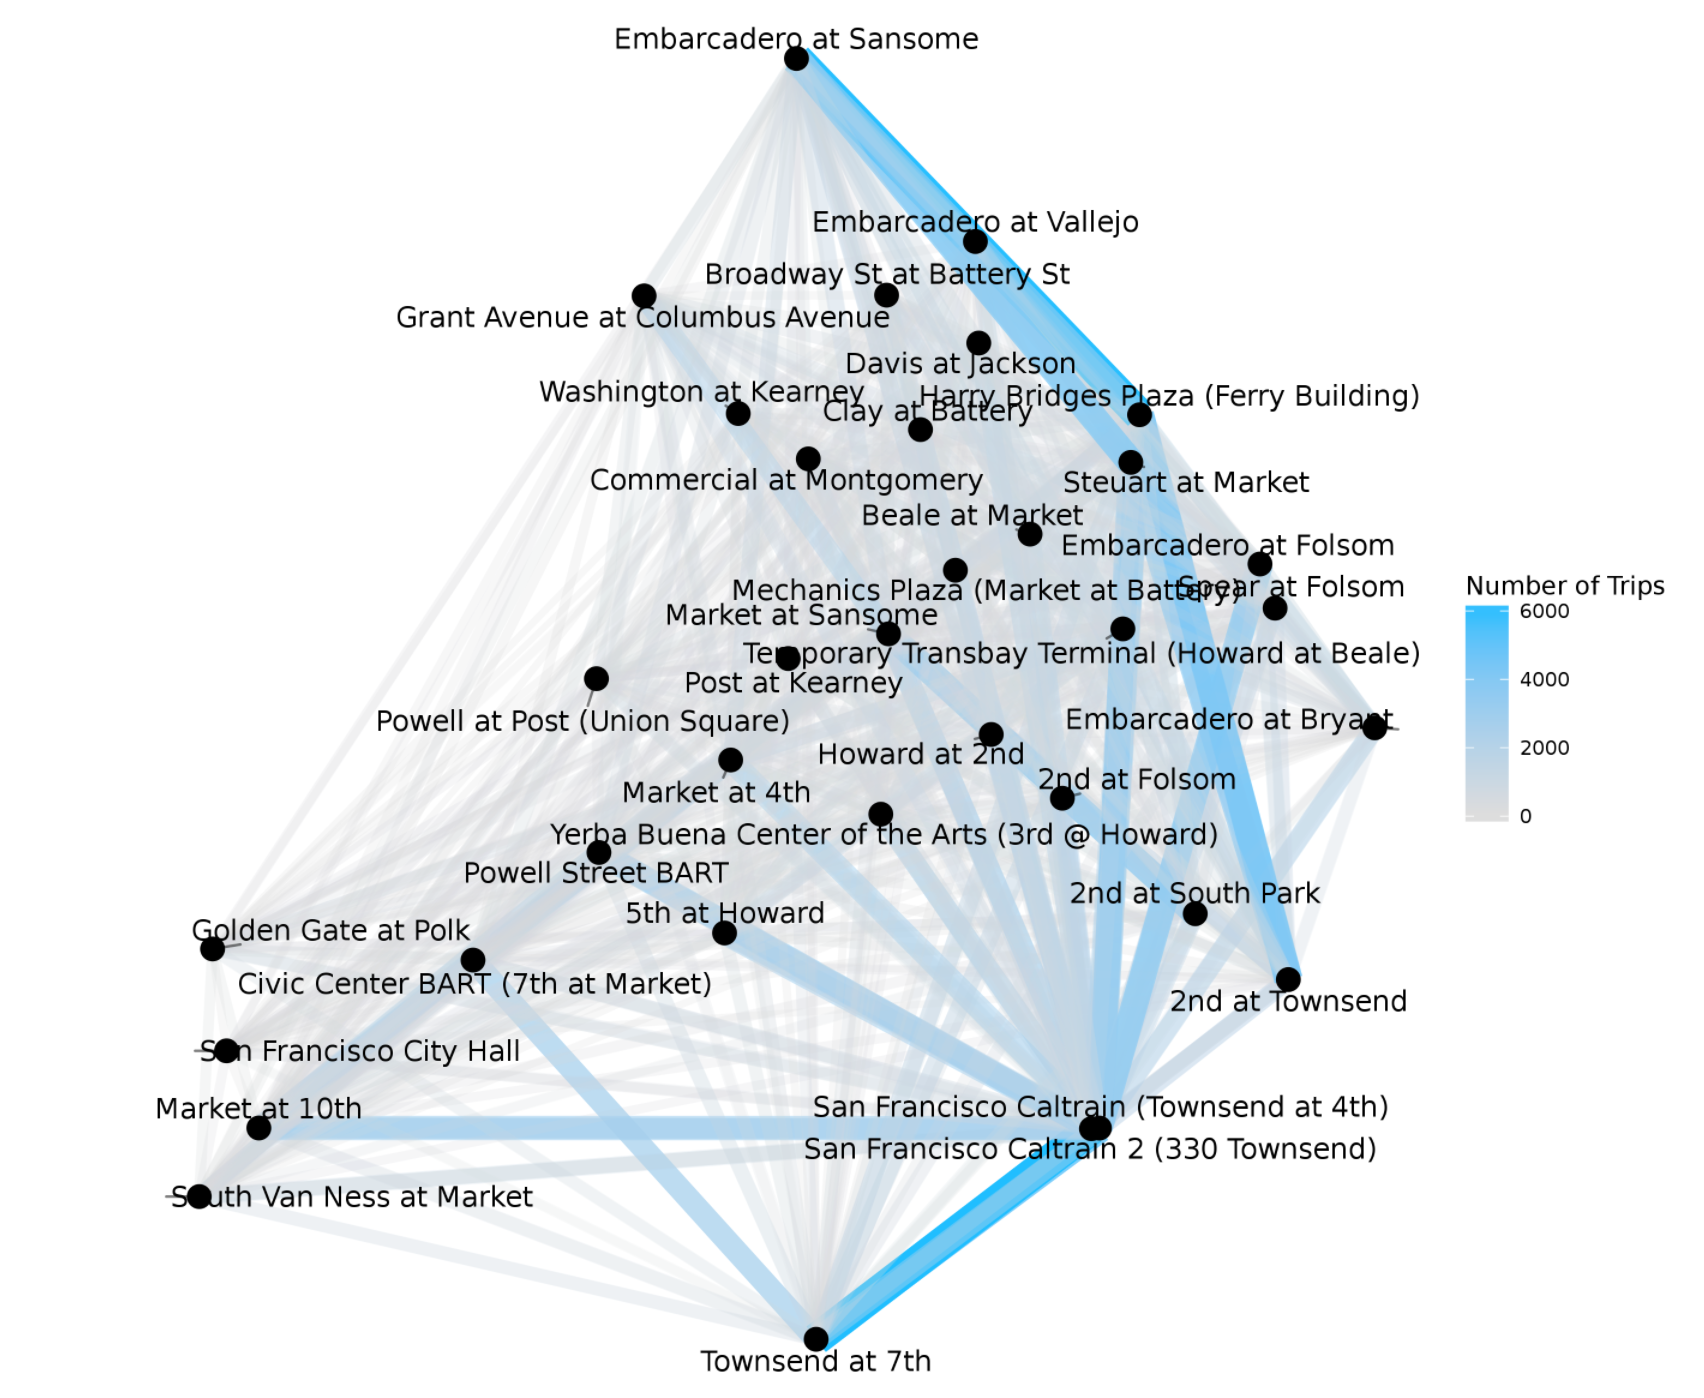

In [36]:
from IPython.display import Image
#PATH = "/home/jovyan/work/"
PATH = "/Users/euhwang/Dropbox/ISTM6212_Final_Project/"
Image(filename = PATH + "SF_Bike_Share_Trips.png", width=1000, height=1000)

## Part 2 - Wrangling (35 points)

Based on what you found above, wrangle the data into a format suitable for analysis. This may involve cleaning, filtering, merging, and modeling steps, any and all of which are valid for this project. Describe your process as you proceed, and document any scripts, databases, or other models you develop. Be specific about any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make about the meaning of variables and their values.

Verify that your wrangling steps have succeeded (for example, if you loaded the data into a dimensional model, ensure that the fact table contains the right number of records).

In [1]:
%load_ext sql

/Users/euhwang/anaconda/envs/3.5/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/euhwang/anaconda/envs/3.5/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


*Note*: To use PostgreSQL on datanotebook.org, please uncomment the lines with username of `dbuser,` and also uncomment and run the commented out command below.

The following commands drops the database 'finalproject' if it exists, then creates the database 'finalproject'.

In [ ]:
!echo 'redspot' | sudo -S service postgresql restart

In [13]:
#!dropdb -U euhwang --if-exists finalproject
!dropdb -U dbuser --if-exists finalproject

NOTICE:  database "finalproject" does not exist, skipping


In [14]:
#!createdb -U euhwang finalproject
!createdb -U dbuser finalproject

In [2]:
#%sql postgresql://euhwang@localhost:5432/finalproject
%sql postgresql://dbuser@localhost:5432/finalproject

'Connected: euhwang@finalproject'

### Create table and import

Looking at a sample of the data, we can determine the domain and range for each attribute. 

Based on the values shown in the csvstat output, we can identify the data type and max length and create the following with the following:

In [32]:
%%sql
DROP TABLE IF EXISTS station;
CREATE TABLE station 
(
     ID INTEGER,
     NAME VARCHAR(45),
     LAT CHAR(20),
     LONG CHAR(20),
     DOCK_COUNT INTEGER,
     CITY VARCHAR(45),
     INSTALLATION_DATE TIMESTAMP
);
DROP TABLE IF EXISTS trip;
CREATE TABLE trip 
(
     ID INTEGER,
     DURATION INTEGER,
     START_DATE TIMESTAMP,
     START_STATION_NAME VARCHAR(45),
     START_STATION_ID INTEGER,
     END_DATE TIMESTAMP,
     END_STATION_NAME VARCHAR(45),
     END_STATION_ID INTEGER,
     BIKE_ID INTEGER,
     SUBSCRIPTION_TYPE CHAR(10),
     ZIP_CODE CHAR(15)
);
DROP TABLE IF EXISTS weather;
CREATE TABLE weather 
(
     DATE TIMESTAMP,
     MAX_TEMPERATURE_F CHAR(10),
     MEAN_TEMPERATURE_F CHAR(10),
     MIN_TEMPERATURE_F CHAR(10),
     MAX_DEW_POINT_F CHAR(10),
     MEAN_DEW_POINT_F CHAR(10),
     MIN_DEW_POINT_F CHAR(10),
     MAX_HUMIDITY CHAR(10),
     MEAN_HUMIDITY CHAR(10),
     MIN_HUMIDITY CHAR(10),
     MAX_SEA_LEVEL_PRESSURE_INCHES CHAR(10),
     MEAN_SEA_LEVEL_PRESSURE_INCHES CHAR(10),
     MIN_SEA_LEVEL_PRESSURE_INCHES CHAR(10),
     MAX_VISIBILITY_MILES CHAR(10),
     MEAN_VISIBILITY_MILES CHAR(10),
     MIN_VISIBILITY_MILES CHAR(10),
     MAX_WIND_SPEED_MPH CHAR(10),
     MEAN_WIND_SPEED_MPH CHAR(10),
     MAX_GUST_SPEED_MPH CHAR(10),
     PRECIPITATION_INCHES CHAR(10),
     CLOUD_COVER CHAR(10),
     EVENTS VARCHAR(20),
     WIND_DIR_DEGREES CHAR(10),
     ZIP_CODE CHAR(15)
);

Done.
Done.
Done.
Done.
Done.
Done.


[]

Now we'll load the data in more simply.  Note that this **requires** the use of an absolute path, so adjust it to your location:

In [30]:
!pwd

/Users/euhwang/Dropbox/ISTM_6212/Final_Project


In [33]:
%%sql
COPY station FROM '/Users/euhwang/Dropbox/ISTM_6212/Final_Project/station.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

COPY trip FROM '/Users/euhwang/Dropbox/ISTM_6212/Final_Project/trip.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

COPY weather FROM '/Users/euhwang/Dropbox/ISTM_6212/Final_Project/weather.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

70 rows affected.
669959 rows affected.
3665 rows affected.


[]

Need to put replace the following command:
Trip250 is only a subset of the trip data.

#COPY trip FROM '/home/jovyan/work/trip.csv'
#CSV
#HEADER
#QUOTE '"'
#DELIMITER ',';

In [ ]:
%%sql
COPY station FROM '/home/jovyan/work/station.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

COPY trip FROM '/home/jovyan/work/trip250.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

COPY weather FROM '/home/jovyan/work/weather.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

In [40]:
%%sql
SELECT count(*), 'station' as table_name FROM station
UNION 
SELECT count(*), 'trip' FROM trip
UNION
SELECT count(*), 'weather' FROM weather;

3 rows affected.


count,table_name
669959,trip
70,station
3665,weather


The following statement uses the INFORMATION_SCHEMA metadata database to extract a schema from a pgsql instance. This provides a quick overview of the column name, data type, max character length and if there are nullable fields. This allows us to understand the table structure, which will help us with my analysis going forward.

In [41]:
%%sql
SELECT column_name, data_type, character_maximum_length, is_nullable
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'station';

7 rows affected.


column_name,data_type,character_maximum_length,is_nullable
id,integer,None,YES
name,character varying,45,YES
lat,character,20,YES
long,character,20,YES
dock_count,integer,None,YES
city,character varying,45,YES
installation_date,timestamp without time zone,None,YES


In [42]:
%%sql
SELECT column_name, data_type, character_maximum_length, is_nullable
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'trip';

11 rows affected.


column_name,data_type,character_maximum_length,is_nullable
id,integer,None,YES
duration,integer,None,YES
start_date,timestamp without time zone,None,YES
start_station_name,character varying,45,YES
start_station_id,integer,None,YES
end_date,timestamp without time zone,None,YES
end_station_name,character varying,45,YES
end_station_id,integer,None,YES
bike_id,integer,None,YES
subscription_type,character,10,YES


In [43]:
%%sql
SELECT column_name, data_type, character_maximum_length, is_nullable
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'weather';

24 rows affected.


column_name,data_type,character_maximum_length,is_nullable
date,timestamp without time zone,None,YES
max_temperature_f,character,10,YES
mean_temperature_f,character,10,YES
min_temperature_f,character,10,YES
max_dew_point_f,character,10,YES
mean_dew_point_f,character,10,YES
min_dew_point_f,character,10,YES
max_humidity,character,10,YES
mean_humidity,character,10,YES
min_humidity,character,10,YES


# *****

The following code imputes values for null cells.  It is important to avoid null values and handle them accordingly when creating a usable data warehouse.  Please note that integer nulls are imputed as -999 and categorical nulls are imputed as "Null."  From the output, it is shown that Complete District, Street Number, Street Name, and Zip have null values for the 2016 dataset.

In [ ]:
%%sql
UPDATE BRcrime_2016 SET complete_district = 'Null' where complete_district is null;
UPDATE BRcrime_2016 SET address = 'Null' where address is null;
UPDATE BRcrime_2016 SET st_number = -999 where st_number is null;
UPDATE BRcrime_2016 SET st_dir = 'Null' where st_dir is null;
UPDATE BRcrime_2016 SET st_name = 'Null' where st_name is null;
UPDATE BRcrime_2016 SET st_type = 'Null' where st_type is null;
UPDATE BRcrime_2016 SET city = 'Null' where city is null;
UPDATE BRcrime_2016 SET state = 'Null' where state is null;
UPDATE BRcrime_2016 SET zip = 'Null' where zip is null;
UPDATE BRcrime_2016 SET geolocation = 'Null' where geolocation is null;

In [ ]:
%%sql 
SELECT *
FROM BRcrime_2016 
LIMIT 5
;

# *****

The following queries checks to see if there are any duplicates.

In [46]:
%%sql
SELECT count(*), id
FROM station
GROUP BY id
HAVING count(*)>1
;

0 rows affected.


count,id


In [47]:
%%sql
SELECT count(*), id
FROM trip
GROUP BY id
HAVING count(*)>1
;

0 rows affected.


count,id


In [49]:
%%sql
SELECT count(*), date, zip_code
FROM weather
GROUP BY date, zip_code
HAVING count(*)>1
;

0 rows affected.


count,date,zip_code


The following query checks to see if there are only unique values. If not, then update the table accordingly. As you can see, there are values for 'rain' and 'Rain'. To be consistent, we updated 'rain' to 'Rain'.

In [53]:
%%sql
SELECT events, count(*)
FROM weather
GROUP BY events
ORDER BY events asc
;

5 rows affected.


events,count
Fog,112
Fog-Rain,17
Rain,390
Rain-Thunderstorm,3
None,3143


In [52]:
%%sql
UPDATE weather 
SET events = 'Rain' 
WHERE events = 'rain'
;

2 rows affected.


[]

In [54]:
%%sql
SELECT subscription_type, count(*)
FROM trip
GROUP BY subscription_type
ORDER BY subscription_type asc
;

2 rows affected.


subscription_type,count
Customer,103213
Subscriber,566746


## Define a star schema

Please note that to view the Star Schema image **requires** the use of an absolute path, so please adjust the PATH to your location:

In [55]:
!pwd

/Users/euhwang/Dropbox/ISTM_6212/Final_Project


In [211]:
from IPython.display import Image
#PATH = "/home/jovyan/work/"
PATH = "/Users/euhwang/Dropbox/ISTM_6212/Final_Project/"

## *******
The design of the star schema created is shown below.  Since there was no primary key in the dataset and no obvious field to sum on, we had to make some adjustments.  It was determined that our data varied by File Number, File Number Event, Offense, Offense Date, Location and Zone.  Therefore, we created dimension tables for each of those and created keys associated with each.  We had to separate these fields since the combination of any of these tables would not be 1:1.  We decided to also separate out the crime dimension table which contains crime and another calculated field called crime type.  This field distinguishes whether the crime was a personal crime, property crime, black market crime, or other minor crime.  This field, plus the Committed/Attempted indicator are converted into binary fields and used as facts in the fact table. We separated out the other dimensions (crime, location, district, date time, and offense) because the affinity was natural. For the offense dimension, we found all the distinct offense and loaded into the offense dimension so that it can be easily joined to the fact table. For the future, we could add a last update timestamp and last update user in each of these dimension and fact tables to allow us to track if a new type of offense was added.
## ********

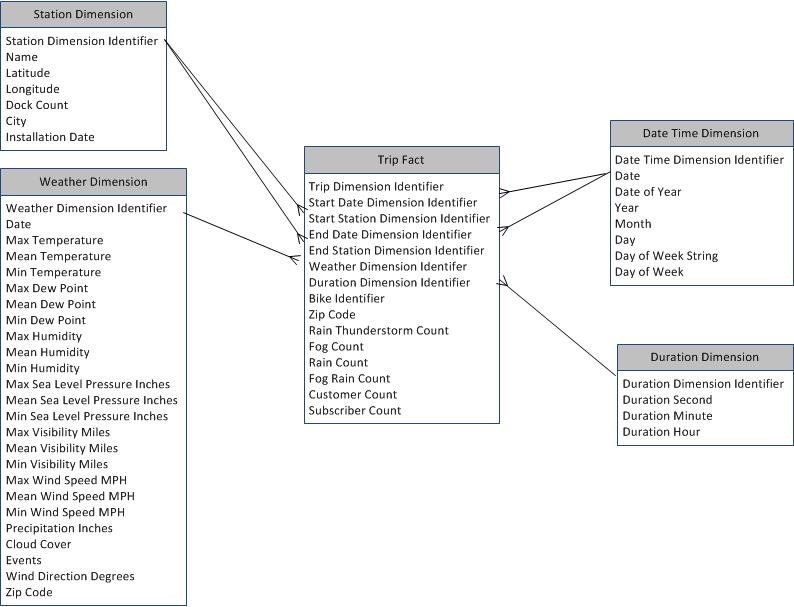

In [212]:
Image(filename = PATH + "SFBikeShareStarSchema.jpg", width=1000, height=1000)

#### The following statements create the Station Dimension table. 

First create a shell table with character and integer types.

In [58]:
%%sql
DROP TABLE IF EXISTS station_dim;
CREATE TABLE station_dim 
(  
     STATION_DIM_ID INTEGER DEFAULT NULL,
     NAME VARCHAR(45) DEFAULT NULL,
     LAT CHAR(20) DEFAULT NULL,
     LONG CHAR(20) DEFAULT NULL,
     DOCK_COUNT INTEGER DEFAULT NULL,
     CITY VARCHAR(45) DEFAULT NULL,
     INSTALLATION_DATE TIMESTAMP DEFAULT NULL 
);

Done.
Done.


[]

Next, insert station information from the source dataset.

In [59]:
%%sql
INSERT INTO station_dim
SELECT * from station
;

70 rows affected.


[]

See the final station dimension table below.

In [81]:
%%sql
select * from station_dim limit 5;

5 rows affected.


station_dim_id,name,lat,long,dock_count,city,installation_date
2,San Jose Diridon Caltrain Station,37.329732,-121.90178200000001,27,San Jose,2013-08-06 00:00:00
3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-05 00:00:00
4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-06 00:00:00
5,Adobe on Almaden,37.331415,-121.8932,19,San Jose,2013-08-05 00:00:00
6,San Pedro Square,37.336721000000004,-121.894074,15,San Jose,2013-08-07 00:00:00


#### The following statements create the Weather Dimension table.

In [82]:
%%sql
DROP TABLE IF EXISTS weather_dim;
CREATE TABLE weather_dim 
(    
     WEATHER_DIM_ID SERIAL PRIMARY KEY,
     DATE TIMESTAMP DEFAULT NULL,
     MAX_TEMPERATURE_F CHAR(10) DEFAULT NULL,
     MEAN_TEMPERATURE_F CHAR(10) DEFAULT NULL,
     MIN_TEMPERATURE_F CHAR(10) DEFAULT NULL,
     MAX_DEW_POINT_F CHAR(10) DEFAULT NULL,
     MEAN_DEW_POINT_F CHAR(10) DEFAULT NULL,
     MIN_DEW_POINT_F CHAR(10) DEFAULT NULL,
     MAX_HUMIDITY CHAR(10) DEFAULT NULL,
     MEAN_HUMIDITY CHAR(10) DEFAULT NULL,
     MIN_HUMIDITY CHAR(10) DEFAULT NULL,
     MAX_SEA_LEVEL_PRESSURE_INCHES CHAR(10) DEFAULT NULL,
     MEAN_SEA_LEVEL_PRESSURE_INCHES CHAR(10) DEFAULT NULL,
     MIN_SEA_LEVEL_PRESSURE_INCHES CHAR(10) DEFAULT NULL,
     MAX_VISIBILITY_MILES CHAR(10) DEFAULT NULL,
     MEAN_VISIBILITY_MILES CHAR(10) DEFAULT NULL,
     MIN_VISIBILITY_MILES CHAR(10) DEFAULT NULL,
     MAX_WIND_SPEED_MPH CHAR(10) DEFAULT NULL,
     MEAN_WIND_SPEED_MPH CHAR(10) DEFAULT NULL,
     MAX_GUST_SPEED_MPH CHAR(10) DEFAULT NULL,
     PRECIPITATION_INCHES CHAR(10) DEFAULT NULL,
     CLOUD_COVER CHAR(10) DEFAULT NULL,
     EVENTS VARCHAR(20) DEFAULT NULL,
     WIND_DIR_DEGREES CHAR(10) DEFAULT NULL,
     ZIP_CODE CHAR(15) DEFAULT NULL
);

Done.
Done.


[]

In [158]:
%%sql
INSERT INTO weather_dim 
     (
     date,
     max_temperature_f,
     mean_temperature_f,
     min_temperature_f,
     max_dew_point_f,
     mean_dew_point_f,
     min_dew_point_f,
     max_humidity,
     mean_humidity,
     min_humidity,
     max_sea_level_pressure_inches,
     mean_sea_level_pressure_inches,
     min_sea_level_pressure_inches,
     max_visibility_miles,
     mean_visibility_miles,
     min_visibility_miles,
     max_wind_Speed_mph,
     mean_wind_speed_mph,
     max_gust_speed_mph,
     precipitation_inches,
     cloud_cover,
     events,
     wind_dir_degrees,
     zip_code
     )
SELECT 
     date,
     max_temperature_f,
     mean_temperature_f,
     min_temperature_f,
     max_dew_point_f,
     mean_dew_point_f,
     min_dew_point_f,
     max_humidity,
     mean_humidity,
     min_humidity,
     max_sea_level_pressure_inches,
     mean_sea_level_pressure_inches,
     min_sea_level_pressure_inches,
     max_visibility_miles,
     mean_visibility_miles,
     min_visibility_miles,
     max_wind_Speed_mph,
     mean_wind_speed_mph,
     max_gust_speed_mph,
     precipitation_inches,
     cloud_cover,
     events,
     wind_dir_degrees,
     zip_code
from weather
;

3665 rows affected.


[]

In the below output, 5 records from the newly created table are shown.

In [159]:
%%sql
select * from weather_dim limit 5;

5 rows affected.


weather_dim_id,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
1,2013-08-29 00:00:00,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107
2,2013-08-30 00:00:00,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,30.05,30.0,29.93,10.0,10.0,7.0,29.0,13.0,35.0,0,2.0,None,291.0,94107
3,2013-08-31 00:00:00,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,30.0,29.96,29.92,10.0,10.0,10.0,26.0,15.0,31.0,0,4.0,None,284.0,94107
4,2013-09-01 00:00:00,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,29.96,29.93,29.91,10.0,10.0,10.0,25.0,13.0,29.0,0,4.0,None,284.0,94107
5,2013-09-02 00:00:00,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,29.94,29.9,10.0,10.0,6.0,23.0,12.0,30.0,0,6.0,None,277.0,94107


#### The following statements create the Datetime Dimension table. This table includes the defined fields breaking the date out into parts.

Creating additional columns such as year, month, and day will increase efficiency of analysis, and is best practice in creating a star schema. Now, an analyst working with the data will be able to query these calculated fields directly instead of having to type in "TO_CHAR(offense_date, 'YYYY')" every time he or she wants to search/filter by one of these date breakouts.

In [77]:
%%sql
DROP TABLE IF EXISTS datetime_dim;
CREATE TABLE datetime_dim (
  datetime_dim_id SERIAL PRIMARY KEY,
  date TIMESTAMP DEFAULT NULL,
  day_of_year CHAR(10) DEFAULT NULL,
  year CHAR(4) DEFAULT NULL,
  month CHAR(2) DEFAULT NULL,
  day CHAR(2) DEFAULT NULL,
  day_of_week_str VARCHAR(9) DEFAULT NULL, 
  day_of_week CHAR(1) DEFAULT NULL
)
;

Done.
Done.


[]

In [78]:
%%sql
INSERT INTO datetime_dim (date)
SELECT distinct start_date
FROM trip
UNION
SELECT distinct end_date
FROM trip
;

508139 rows affected.


[]

In [79]:
%%sql
UPDATE datetime_dim
SET day_of_year = TO_CHAR(date, 'YYYY-MM-DD'),
    year = TO_CHAR(date, 'YYYY'),
    month = TO_CHAR(date, 'MM'),
    day = TO_CHAR(date, 'DD'),
    day_of_week_str = TO_CHAR(date, 'Day'),
    day_of_week = TO_CHAR(date, 'D')
;

508139 rows affected.


[]

In [80]:
%%sql
select * from datetime_dim limit 5;

5 rows affected.


datetime_dim_id,date,day_of_year,year,month,day,day_of_week_str,day_of_week
1,2013-08-29 09:08:00,2013-08-29,2013,08,29,Thursday,5
2,2013-08-29 09:11:00,2013-08-29,2013,08,29,Thursday,5
3,2013-08-29 09:24:00,2013-08-29,2013,08,29,Thursday,5
4,2013-08-29 09:25:00,2013-08-29,2013,08,29,Thursday,5
5,2013-08-29 09:31:00,2013-08-29,2013,08,29,Thursday,5


#### The following statements create the Duration Dimension table.

In [127]:
%%sql
DROP TABLE IF EXISTS duration_dim;
CREATE TABLE duration_dim (
  duration_dim_id SERIAL PRIMARY KEY,
  duration_sec REAL DEFAULT NULL,
  duration_min REAL DEFAULT NULL,
  duration_hour REAL DEFAULT NULL
)
;

Done.
Done.


[]

In [128]:
%%sql
INSERT INTO duration_dim (duration_sec)
SELECT distinct duration
FROM trip
;

16129 rows affected.


[]

In [129]:
%%sql
UPDATE duration_dim
SET duration_min = duration_sec/60,
    duration_hour = duration_sec/(3600)
;

16129 rows affected.


[]

In [130]:
%%sql
select * from duration_dim limit 5;

5 rows affected.


duration_dim_id,duration_sec,duration_min,duration_hour
1,251.0,4.18333,0.0697222
2,2848.0,47.4667,0.791111
3,3565.0,59.4167,0.990278
4,2026.0,33.7667,0.562778
5,66532.0,1108.87,18.4811


# The following statements create the Trip Fact table. 

In [131]:
%%sql
DROP TABLE IF EXISTS trip_fact;
CREATE TABLE trip_fact (
  TRIP_DIM_ID INTEGER,
  START_DATE_DIM_ID INTEGER,
  START_STATION_DIM_ID INTEGER, 
  END_DATE_DIM_ID INTEGER,
  END_STATION_DIM_ID INTEGER,   
  WEATHER_DIM_ID INTEGER, 
  DURATION_DIM_ID INTEGER,
  BIKE_ID INTEGER,  
  ZIP_CODE CHAR(15),
  RAIN_THUNDERSTORM_CNT INTEGER, 
  FOG_CNT INTEGER, 
  RAIN_CNT INTEGER, 
  FOG_RAIN_CNT INTEGER, 
  CUSTOMER_CNT INTEGER,
  SUBSCRIBER_CNT INTEGER
);

Done.
Done.


[]

#### The following statement updates the fact table with all the trip ids.

In [132]:
%%sql
INSERT INTO trip_fact (trip_dim_id, bike_id, zip_code)
SELECT id, bike_id, zip_code from trip
;

669959 rows affected.


[]

#### The following statement updates the fact table with the associated start and end station dim id.

In [134]:
%%sql
UPDATE 
  trip_fact T1  
SET 
  start_station_dim_id = T2.station_dim_id 
FROM 
  station_dim T2 
  INNER JOIN trip T3 ON T2.station_dim_id = T3.start_station_id
WHERE 
  T1.trip_dim_id = T3.id
;

UPDATE 
  trip_fact T1  
SET 
  end_station_dim_id = T2.station_dim_id 
FROM 
  station_dim T2 
  INNER JOIN trip T3 ON T2.station_dim_id = T3.end_station_id
WHERE 
  T1.trip_dim_id = T3.id
;

669959 rows affected.
669959 rows affected.


[]

#### The following statement updates the fact table with the associated start and end date dim id.

In [144]:
%%sql
UPDATE 
  trip_fact T1  
SET 
  start_date_dim_id = T2.datetime_dim_id 
FROM 
  datetime_dim T2 
  INNER JOIN trip T3 ON T2.date = T3.start_date
WHERE 
  T1.trip_dim_id = T3.id
;

UPDATE 
  trip_fact T1  
SET 
  end_date_dim_id = T2.datetime_dim_id 
FROM 
  datetime_dim T2 
  INNER JOIN trip T3 ON T2.date = T3.end_date
WHERE 
  T1.trip_dim_id = T3.id
;

669959 rows affected.
669959 rows affected.


[]

#### The following statement updates the fact table with the associated weather dim id.

In [160]:
%%sql
UPDATE 
  trip_fact T1  
SET 
  weather_dim_id = T2.weather_dim_id 
FROM 
  weather_dim T2 
  INNER JOIN trip T3 ON TO_CHAR(T2.date, 'YYYY-MM-DD') = TO_CHAR(T3.start_date, 'YYYY-MM-DD')
                    AND T2.zip_code = T3.zip_code
WHERE 
  T1.trip_dim_id = T3.id
;

95299 rows affected.


[]

#### The following statement updates the fact table with the associated duration dim id.

In [148]:
%%sql
UPDATE 
  trip_fact T1  
SET 
  duration_dim_id = T2.duration_dim_id 
FROM 
  duration_dim T2 
  INNER JOIN trip T3 ON T2.duration_sec = T3.duration
WHERE 
  T1.trip_dim_id = T3.id
;

669959 rows affected.


[]

#### The following statement updates the fact table with the associated rain_thunderstorm, fog, rain, and fog_rain count.

***WARNING!!!*** Need to think about how to tackle the null events (rain, fog, rain_thunderstorm, fog_rain) becuase it is not setting it to 0.

In [210]:
%%sql
UPDATE 
    trip_fact T1
SET (RAIN_THUNDERSTORM_CNT, FOG_CNT, RAIN_CNT, FOG_RAIN_CNT) = 
    ( 
    CASE WHEN events = 'Rain-Thunderstorm' THEN 1 ELSE 0 END,
    CASE WHEN events = 'Fog' THEN 1 ELSE 0 END,
    CASE WHEN events = 'Rain' THEN 1 ELSE 0 END,
    CASE WHEN events = 'Fog-Rain' THEN 1 ELSE 0 END
    )
FROM
    weather_dim T2
WHERE
    T1.weather_dim_id = T2.weather_dim_id
;

95299 rows affected.


[]

#### The following statement updates the fact table with the associated customer and subscriber count.

In [196]:
%%sql
UPDATE 
    trip_fact T1
SET (CUSTOMER_CNT, SUBSCRIBER_CNT) = 
    ( 
    CASE WHEN subscription_type = 'Customer' THEN 1 ELSE 0 END,
    CASE WHEN subscription_type = 'Subscriber' THEN 1 ELSE 0 END
    )
FROM
    trip T2
WHERE
    T1.trip_dim_id = T2.id;

669959 rows affected.


[]

## Part 3 - Analysis (35 points)

Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1 with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover, discussing them and whether the results match your expectations. Include charts or other visuals that support your analysis. You may use Tableau, ggplot, or other tools we have not covered in class for visualization, but be sure to export images and to include them properly in your writeup.

The output below shows the first five records in the fact table.  Columns 1-6 are all ID columns and the remaining columns contain the facts.

In [209]:
%%sql
select * from trip_fact limit 5;

5 rows affected.


trip_dim_id,start_date_dim_id,start_station_dim_id,end_date_dim_id,end_station_dim_id,weather_dim_id,duration_dim_id,bike_id,zip_code,rain_thunderstorm_cnt,fog_cnt,rain_cnt,fog_rain_cnt,customer_cnt,subscriber_cnt
294216,181259,55,181262,56,1007,12279,477,94107,0,0,0,0,0,1
293842,181133,65,181137,70,1007,3438,374,94107,0,0,0,0,0,1
287965,177789,76,177793,69,1002,14780,600,94107,0,0,0,0,0,1
287784,177618,69,177620,65,1001,3209,317,94107,0,0,0,0,0,1
285256,176250,65,176264,48,1000,7642,574,94107,0,0,0,0,0,1


In [7]:
%%sql
select count(*), year
from trip_fact a join datetime_dim b on a.start_date_dim_id = b.datetime_dim_id
group by year;

3 rows affected.


count,year
243057,2015
326339,2014
100563,2013


## Attestation: All project team members should contribute meaningfully to the final results. Please attest to your individual contributions and that each member contributed substantially to the project in your final writeup.

## Bonus - Augment (10 points)

Sometimes the most value can be gained from one dataset when it is studied alongside data drawn from other sources. Identify at least one additional data source that can complement your analysis. Pull this additional data into your chosen environment and explore at least one more theme you are able to further analyze that depends upon a combination of data from both sources.

##  END